In [3]:
import kornia_rs
import tensorflow as tf
import cv2
import PIL

print("Kornia-rs: " + kornia_rs.__version__)
print("Tensorflow: " + tf.__version__)
print("OpenCV: " + cv2.__version__)
print("PIL/Pillow: " + PIL.__version__)

Kornia-rs: 0.1.9-rc.2
Tensorflow: 2.19.0
OpenCV: 4.11.0
PIL/Pillow: 11.0.0


In [4]:
# JPEG Decoding

import io
from PIL import Image
import numpy as np
import timeit

N = 1000

with open("data/720p.jpeg", "rb") as f:
    image_720p = io.BytesIO(f.read())

with open("data/1080p.jpeg", "rb") as f:
    image_1080p = io.BytesIO(f.read())

with open("data/2k.jpeg", "rb") as f:
    image_2k = io.BytesIO(f.read())

with open("data/4k.jpeg", "rb") as f:
    image_4k = io.BytesIO(f.read())

# ============================
# Kornia-rs
# ============================
#
# Turbojpeg
def load_with_kornia_rs_720p():
    np.array(kornia_rs.decode_image_jpeg(image_720p.getvalue(), "rgb"))

def load_with_kornia_rs_1080p():
    np.array(kornia_rs.decode_image_jpeg(image_1080p.getvalue(), "rgb"))

def load_with_kornia_rs_2k():
    np.array(kornia_rs.decode_image_jpeg(image_2k.getvalue(), "rgb"))

def load_with_kornia_rs_4k():
    np.array(kornia_rs.decode_image_jpeg(image_4k.getvalue(), "rgb"))

# Warmup runs
for _ in range(10):
    load_with_kornia_rs_720p()
    load_with_kornia_rs_1080p()
    load_with_kornia_rs_2k()
    load_with_kornia_rs_4k()

kornia_rs_720p = timeit.timeit(load_with_kornia_rs_720p, number=N) / N * 1e3
kornia_rs_1080p = timeit.timeit(load_with_kornia_rs_1080p, number=N) / N * 1e3
kornia_rs_2k = timeit.timeit(load_with_kornia_rs_2k, number=N) / N * 1e3
kornia_rs_4k = timeit.timeit(load_with_kornia_rs_4k, number=N) / N * 1e3

print("kornia_rs 720p = " + str(kornia_rs_720p))
print("kornia_rs 1080p = " + str(kornia_rs_1080p))
print("kornia_rs 2k = " + str(kornia_rs_2k))
print("kornia_rs 4k = " + str(kornia_rs_4k))

kornia_rs 720p = 1.5627572539997345
kornia_rs 1080p = 3.42416170999968
kornia_rs 2k = 6.104661242000475
kornia_rs 4k = 27.301310498999555


In [5]:
# Raw Jpeg
def load_with_kornia_rs_raw_720p():
    kornia_rs.decode_image_raw_jpeg(image_720p.getvalue(), [720, 1280], "rgb")

def load_with_kornia_rs_raw_1080p():
    kornia_rs.decode_image_raw_jpeg(image_1080p.getvalue(), [1080, 1920], "rgb")

def load_with_kornia_rs_raw_2k():
    kornia_rs.decode_image_raw_jpeg(image_2k.getvalue(), [1440, 2560], "rgb")

def load_with_kornia_rs_raw_4k():
    kornia_rs.decode_image_raw_jpeg(image_4k.getvalue(), [2160, 3840], "rgb")

# Warmup runs
for _ in range(10):
    load_with_kornia_rs_raw_720p()
    load_with_kornia_rs_raw_1080p()
    load_with_kornia_rs_raw_2k()
    load_with_kornia_rs_raw_4k()

kornia_rs_raw_720p = timeit.timeit(load_with_kornia_rs_raw_720p, number=N) / N * 1e3
kornia_rs_raw_1080p = timeit.timeit(load_with_kornia_rs_raw_1080p, number=N) / N * 1e3
kornia_rs_raw_2k = timeit.timeit(load_with_kornia_rs_raw_2k, number=N) / N * 1e3
kornia_rs_raw_4k = timeit.timeit(load_with_kornia_rs_raw_4k, number=N) / N * 1e3

print("kornia_rs Raw 720p = " + str(kornia_rs_raw_720p))
print("kornia_rs Raw 1080p = " + str(kornia_rs_raw_1080p))
print("kornia_rs Raw 2k = " + str(kornia_rs_raw_2k))
print("kornia_rs Raw 4k = " + str(kornia_rs_raw_4k))

kornia_rs Raw 720p = 1.6408183610001288
kornia_rs Raw 1080p = 3.7278052110004865
kornia_rs Raw 2k = 6.529187834000368
kornia_rs Raw 4k = 25.972558077999565


In [6]:
# ============================
# PIL
# ============================
def load_with_pil_720p():
    np.array(Image.open(image_720p))

def load_with_pil_1080p():
    np.array(Image.open(image_1080p))

def load_with_pil_2k():
    np.array(Image.open(image_2k))

def load_with_pil_4k():
    np.array(Image.open(image_4k))

# Warmup runs
for _ in range(10):
    load_with_pil_720p()
    load_with_pil_1080p()
    load_with_pil_2k()
    load_with_pil_4k()

pil_720p = timeit.timeit(load_with_pil_720p, number=N) / N * 1e3
pil_1080p = timeit.timeit(load_with_pil_1080p, number=N) / N * 1e3
pil_2k = timeit.timeit(load_with_pil_2k, number=N) / N * 1e3
pil_4k = timeit.timeit(load_with_pil_4k, number=N) / N * 1e3

print("pil 720p = " + str(pil_720p))
print("pil 1080p = " + str(pil_1080p))
print("pil 2k = " + str(pil_2k))
print("pil 4k = " + str(pil_4k))

pil 720p = 1.9658007459993314
pil 1080p = 5.023437707000085
pil 2k = 10.27421573599986
pil 4k = 54.526334903000134


In [7]:
# ============================
# TensorFlow
# ============================
tf.config.threading.set_intra_op_parallelism_threads(1)
tf.config.threading.set_inter_op_parallelism_threads(1)

def load_with_tf_720p():
    np.array(tf.io.decode_image(image_720p.getvalue(), channels=3))

def load_with_tf_1080p():
    np.array(tf.io.decode_image(image_1080p.getvalue(), channels=3))

def load_with_tf_2k():
    np.array(tf.io.decode_image(image_2k.getvalue(), channels=3))

def load_with_tf_4k():
    np.array(tf.io.decode_image(image_4k.getvalue(), channels=3))

# Warmup runs
for _ in range(10):
    load_with_tf_720p()
    load_with_tf_1080p()
    load_with_tf_2k()
    load_with_tf_4k()

tf_720p = timeit.timeit(load_with_tf_720p, number=N) / N * 1e3
tf_1080p = timeit.timeit(load_with_tf_1080p, number=N) / N * 1e3
tf_2k = timeit.timeit(load_with_tf_2k, number=N) / N * 1e3
tf_4k = timeit.timeit(load_with_tf_4k, number=N) / N * 1e3

print("Tensorflow 720p = " + str(tf_720p))
print("Tensorflow 1080p = " + str(tf_1080p))
print("Tensorflow 2k = " + str(tf_2k))
print("Tensorflow 4k = " + str(tf_4k))

2025-04-20 17:28:22.497275: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Tensorflow 720p = 1.414128342999902
Tensorflow 1080p = 2.9849534369996036
Tensorflow 2k = 5.395752950000315
Tensorflow 4k = 25.533888036999997


In [8]:
# ============================
# OpenCV
# ============================
cv2.setNumThreads(1)

buffer_720p = np.frombuffer(image_720p.getvalue(), np.uint8)
buffer_1080p = np.frombuffer(image_1080p.getvalue(), np.uint8)
buffer_2k = np.frombuffer(image_2k.getvalue(), np.uint8)
buffer_4k = np.frombuffer(image_4k.getvalue(), np.uint8)

def load_with_cv2_720p():
    np.array(cv2.imdecode(buffer_720p, cv2.IMREAD_COLOR))

def load_with_cv2_1080p():
    np.array(cv2.imdecode(buffer_1080p, cv2.IMREAD_COLOR))

def load_with_cv2_2k():
    np.array(cv2.imdecode(buffer_2k, cv2.IMREAD_COLOR))

def load_with_cv2_4k():
    np.array(cv2.imdecode(buffer_4k, cv2.IMREAD_COLOR))

# Warmup runs
for _ in range(10):
    load_with_cv2_720p()
    load_with_cv2_1080p()
    load_with_cv2_2k()
    load_with_cv2_4k()

cv2_720p = timeit.timeit(load_with_cv2_720p, number=N) / N * 1e3
cv2_1080p = timeit.timeit(load_with_cv2_1080p, number=N) / N * 1e3
cv2_2k = timeit.timeit(load_with_cv2_2k, number=N) / N * 1e3
cv2_4k = timeit.timeit(load_with_cv2_4k, number=N) / N * 1e3

print("OpenCV 720p = " + str(cv2_720p))
print("OpenCV 1080p = " + str(cv2_1080p))
print("OpenCV 2k = " + str(cv2_2k))
print("OpenCV 4k = " + str(cv2_4k))

OpenCV 720p = 1.4798701510007959
OpenCV 1080p = 3.41876102399965
OpenCV 2k = 5.771059263999632
OpenCV 4k = 27.767797230000724


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


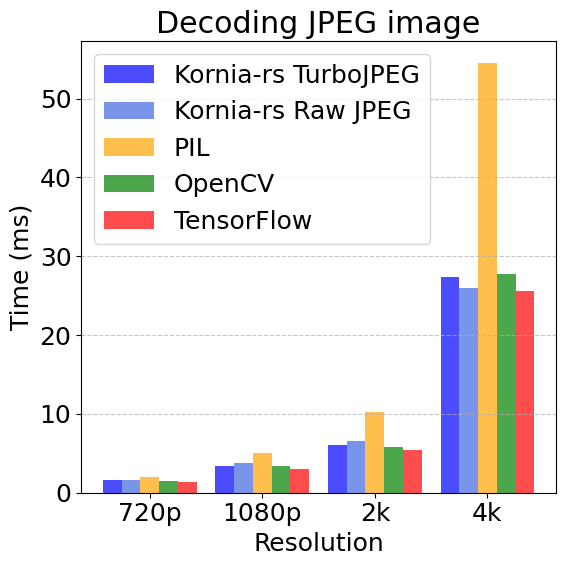

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Resolutions and average times
resolutions = ['720p', '1080p', '2k', '4k']
kornia_rs_avg = [kornia_rs_720p, kornia_rs_1080p, kornia_rs_2k, kornia_rs_4k]
kornia_rs_raw_avg = [kornia_rs_raw_720p, kornia_rs_raw_1080p, kornia_rs_raw_2k, kornia_rs_raw_4k]
pil_avg = [pil_720p, pil_1080p, pil_2k, pil_4k]
opencv_avg = [cv2_720p, cv2_1080p, cv2_2k, cv2_4k]
tf_avg = [tf_720p, tf_1080p, tf_2k, tf_4k]

# Bar width and positions
bar_width = 0.05
x = np.arange(len(resolutions)) * 0.30

# Plotting the histogram
plt.figure(figsize=(6, 6))
plt.rcParams.update({'font.size': 18})

bars1 = plt.bar(x, kornia_rs_avg, bar_width, label='Kornia-rs TurboJPEG', color='blue', alpha=0.7)
bars2 = plt.bar(x + bar_width, kornia_rs_raw_avg, bar_width, label='Kornia-rs Raw JPEG', color='royalblue', alpha=0.7)
bars3 = plt.bar(x + 2 * bar_width, pil_avg, bar_width, label='PIL', color='orange', alpha=0.7)
bars4 = plt.bar(x + 3 * bar_width, opencv_avg, bar_width, label='OpenCV', color='green', alpha=0.7)
bars5 = plt.bar(x + 4 * bar_width, tf_avg, bar_width, label="TensorFlow", color="red", alpha=0.7)

# Adding labels, title, and legend
plt.xlabel('Resolution')
plt.ylabel('Time (ms)')
plt.title('Decoding JPEG image')
plt.xticks(x + bar_width * 2, resolutions, ha='center')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding values on top of bars
# for bars in [bars1, bars2, bars3, bars4, bars5]:
#     for bar in bars:
#         height = bar.get_height()
#         plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom', fontsize=8)
plt.tight_layout()
plt.savefig("python_decoding_jpeg_image.pdf", format="pdf")
plt.savefig("python_decoding_jpeg_image.eps", format="eps")
plt.show()